#### How exactly do we find the value of K?
How changing k from low to hign will impact our decision boundary?  
If k = 1 It means it is going to let your outliers really decide the decision boundary around them.  
Lets say We have a lot of crosses and in beetween we have a dot.  
So the decision boundary in betwenn will not be as smooth as it is but it is going to be a one part that belongs to dot class. 
But if we increase the value of k whats going to happen is it will take all the crosses insidde it and it will make the dot irrelevant.  
So very low value of k leads to overfitting and high value of k, effectively it doesnt matters who your neighbours are, what matters will be what class data do you have more.  
If we have class a which has 100 data points, and b which has 50 datapoints, and k value is 100, then we will always predict a. 
IF K IS HIGH, WE ARE DOING UNDERFITTING, IF K IS LOW, WE ARE DOING OVERFITTING.  
What we need to do is we need to find the optimal k.  
We cant really find the optimal k using the testing data becuase it destroys the purpose of testing data.  
Testing data is when you have trained your model,decided the parameters, now lets use the testing data to test how good or bad our classifier is.  
So we want to use the training data to decide what the k is. 
If we jsut use the training data and try and predict on training daata itself, k = 1 will be perfect.  
So we will use the cross validation to find the best case. 


In [8]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [2]:
dataset = datasets.load_breast_cancer()

In [3]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, random_state = 0)

In [5]:
clf = KNeighborsClassifier()

In [6]:
## Fitting the training data
clf.fit(X_train, Y_train)

KNeighborsClassifier()

In [7]:
clf.score(X_test, Y_test)


0.9385964912280702

In [10]:
## We will generate this values again and again for different values of k and then we want to find the cross validation score 
## and see how good or bad we are performing.  
## What we doing is we are running cross val score with different values of k where we defined the value of 
## k in KNeighborsClassifier. And thne we are printing the mean of the score.

x = []
y = []
for i in range(1, 26, 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf, X_train, Y_train)
    x.append(i)
    y.append(score.mean())
    print(i, score.mean())

1 0.9208791208791209
3 0.9318681318681319
5 0.9208791208791209
7 0.9274725274725275
9 0.9362637362637363
11 0.9318681318681319
13 0.9362637362637363
15 0.9230769230769231
17 0.9230769230769231
19 0.9208791208791209
21 0.9186813186813186
23 0.9142857142857143
25 0.9142857142857143


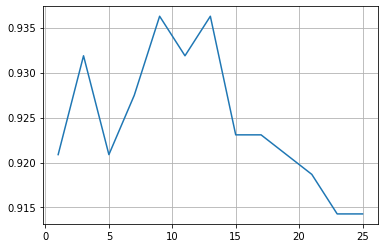

In [11]:
## to analyse it, we need to plot the graph.
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.grid()
plt.show()

## Above is the way to find the optimal value of k.